# Import packages

In [1]:
#from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Get Data

In [2]:
data = pd.read_csv('../raw_data/application_train.csv')

In [3]:
df = data.copy()

In [4]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(307511, 122)

 # Remove some entries

Looking at /notebooks/Data_Preparation.ipynb
Some categorical variables includes values which are not empty but are not defined
- labelled as XNA for 'CODE_GENDER'
- Unknown for 'NAME_FAMILY_STATUS'

Let's Remove these entries

In [6]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [7]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [8]:
df.shape

(307511, 122)

In [9]:
# Remove entries with gender = XNA
df = df[df['CODE_GENDER'] != 'XNA']

# Remove entries with gender = XNA
df = df[df['NAME_FAMILY_STATUS'] != 'Unknown']

df.shape

(307505, 122)

# Outliers

In [11]:
# Show all unique values
df['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-12588         1
-8229          1
-12794         1
-11823         1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

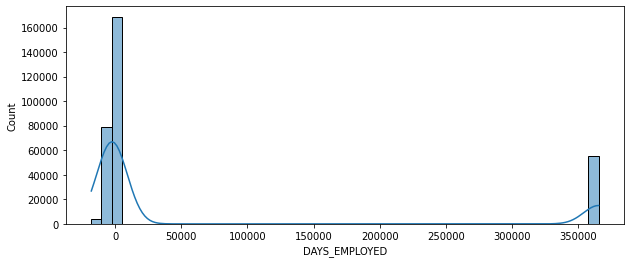

In [10]:
plt.figure(figsize = (10, 4))
sns.histplot(df['DAYS_EMPLOYED'], kde=True, bins= 50);

The values mean Days since employed 

In [15]:
max(df['DAYS_EMPLOYED']), max(df['DAYS_EMPLOYED'])/365 
# 350_000  days? That's like 1_000 years! 
# which is not a reasonable value

(365243, 1000.6657534246575)

In [16]:
# Remove entries with DAYS_EMPLOYED > 200_000
df = df[df['DAYS_EMPLOYED'] < 200_000]

df.shape # Previous df.shape : (307505, 122)

(252131, 122)

# Distributions

## Days employed

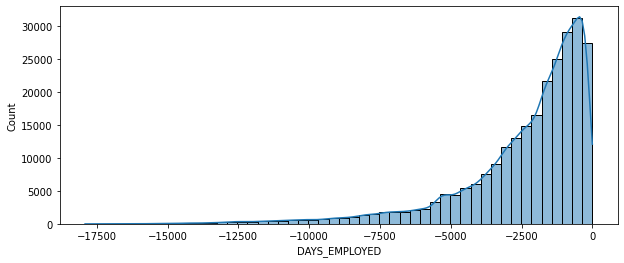

In [17]:
# Plot the distribution number of days employed

plt.figure(figsize = (10, 4))
sns.histplot(df['DAYS_EMPLOYED'], kde=True, bins= 50);

In [ ]:
Most probably, the negative values do not mean Unemployed, but only past records.

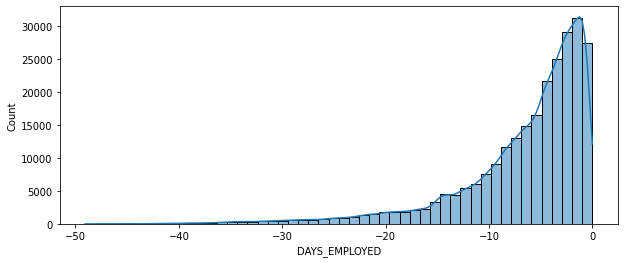

In [23]:
# Plot the distribution number of days employed

plt.figure(figsize = (10, 4))
sns.histplot(df['DAYS_EMPLOYED']/365, kde=True, bins= 50);

The employment period range is between approximative 0 and 49 years.

## Days from birth

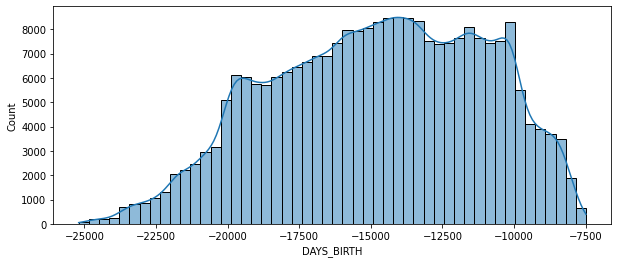

In [21]:
# Plot the distribution number of days from birth.

plt.figure(figsize = (10, 4))
sns.histplot(df['DAYS_BIRTH'], kde=True, bins= 50);

The negative value means that the date of birth is in the past. 

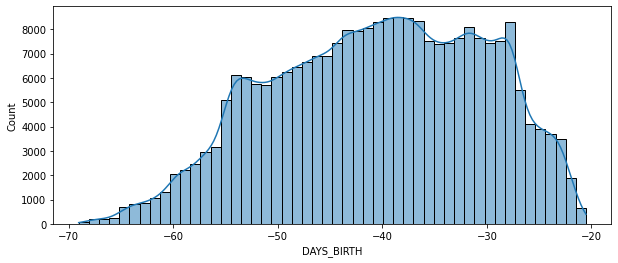

In [22]:
# Plot the distribution number of days from birth.

plt.figure(figsize = (10, 4))
sns.histplot(df['DAYS_BIRTH']/365, kde=True, bins= 50);

The age range is between approximative 20 and 68 years.

## Days of registration

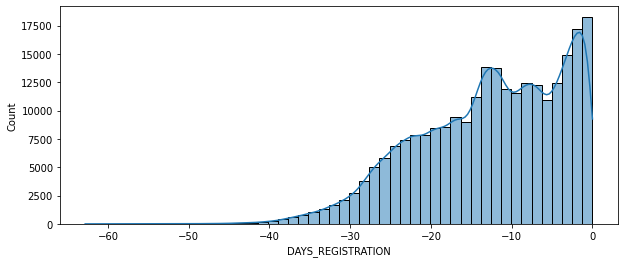

In [26]:
# Plot the distribution of days registration

plt.figure(figsize = (10, 4))
sns.histplot(df['DAYS_REGISTRATION']/365, kde=True, bins= 50);

## Table : Days from birth and since employed

In [47]:
df[df['DAYS_BIRTH']/365 >= -21.1][['DAYS_BIRTH', 'DAYS_EMPLOYED', 'TARGET']]

,DAYS_BIRTH,DAYS_EMPLOYED,TARGET
12949,-7690,-216,0
13589,-7689,-990,0
19115,-7680,-597,0
35956,-7683,-139,0
37558,-7687,-524,0
...,...,...,...
280935,-7690,-920,0
284744,-7692,-369,0
291874,-7698,-793,0
300617,-7700,-475,1


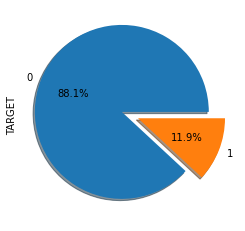

In [51]:
tab = df[df['DAYS_BIRTH']/365 >= -21.1][['DAYS_BIRTH', 'DAYS_EMPLOYED', 'TARGET']]
tab['TARGET'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True);

In [52]:
7690/365, 216/30
 # Here, a 21-year-old has been employed for 7 years, which looks good to repay loans

(21.068493150684933, 7.2)

In [53]:
df[df['DAYS_BIRTH']/365 < -67.6][['DAYS_BIRTH', 'DAYS_EMPLOYED', 'TARGET']]

,DAYS_BIRTH,DAYS_EMPLOYED,TARGET
1976,-24695,-2392,0
2276,-25007,-1438,0
6286,-24755,-3083,0
6884,-24678,-2652,0
7181,-25075,-2309,0
...,...,...,...
298553,-24739,-6236,0
302386,-25068,-1617,0
302423,-24832,-3455,0
303130,-24776,-1513,0


In [54]:
24695/365, 2392/365
# Here, a 67-year-old has only been employed for 6 years, which is may be hard to repay loans !

(67.65753424657534, 6.553424657534246)

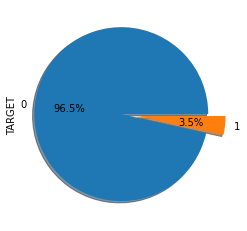

In [55]:
tab = df[df['DAYS_BIRTH']/365 < -67.6][['DAYS_BIRTH', 'DAYS_EMPLOYED', 'TARGET']]
tab['TARGET'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True);